In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.__version__

'3.3.4'

In [191]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_xticklabels(col_labels)
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_yticklabels(row_labels)
    

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())*.7

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold or im.norm(data[i, j]) < threshold/2.4)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [13]:
df = pd.read_csv("combined.csv")
df.head()

,Unnamed: 0,row_index,function_type,degree,depth,num_layers,width,layer_width,num_variables,erm_num_samples,num_training_epochs,num_iter,net_type,train_batch_size,learning_rate,train_loss_initial,val_loss_initial,train_loss_final,val_loss_final
0,0,0,parity,8,two,2,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,7961.731686,8.056352e+03,7777.235717,8.215983e+03
1,0,1,parity,8,two,2,d,8,32,8000,100,800000,ReLUResNet,20,0.01,7931.745602,8.087424e+03,7570.531501,8.419276e+03
2,0,10,parity,8,d,8,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,7853.135529,8.228917e+03,4979.369635,1.131037e+04
3,0,100,complete,16,half_d,8,half_d,8,32,16000,100,1600000,ReLUResNet,20,0.01,18.020481,6.442453e+08,0.004184,1.503239e+09
4,0,101,complete,16,half_d,8,d,16,32,16000,100,1600000,ReLUResNet,20,0.01,32.978651,1.073742e+09,0.390756,1.288490e+09


In [3]:
args_df = pd.read_csv("data.csv")

In [4]:
args_df

,Unnamed: 0,function_type,degree,depth,width,num_variables,num_samples,num_training_epochs
0,0,parity,8,two,half_d,32,1000d,100
1,1,parity,8,two,d,32,1000d,100
2,2,parity,8,two,2d,32,1000d,100
3,3,parity,8,two,4d,32,1000d,100
4,4,parity,8,half_d,half_d,32,1000d,100
...,...,...,...,...,...,...,...,...
223,223,random,8,half_d,4d,32,1000d,100
224,224,random,8,d,half_d,32,1000d,100
225,225,random,8,d,d,32,1000d,100
226,226,random,8,d,2d,32,1000d,100


In [12]:
df.sort_values(by=["val_loss_final"])

,Unnamed: 0,row_index,function_type,degree,depth,num_layers,width,layer_width,num_variables,erm_num_samples,num_training_epochs,num_iter,net_type,train_batch_size,learning_rate,train_loss_initial,val_loss_initial,train_loss_final,val_loss_final
102,0,190,half_msp,8,d,8,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,7.460386e+03,7.688874e+03,0.000050,0.000060
198,0,72,complete,8,two,2,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,1.720957e+06,1.936052e+06,0.000033,0.000752
61,0,153,msp,8,d,8,d,8,32,8000,100,800000,ReLUResNet,20,0.01,1.386813e+03,1.482624e+03,0.000143,0.003498
60,0,152,msp,8,d,8,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,1.370768e+03,1.374873e+03,0.001234,0.006589
141,0,225,random,8,d,8,d,8,32,8000,100,800000,ReLUResNet,20,0.01,8.108513e+03,8.337193e+03,0.009227,0.009663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,91,complete,12,half_d,6,4d,48,32,12000,100,1200000,ReLUResNet,20,0.01,NaN,NaN,NaN,NaN
220,0,92,complete,12,d,12,half_d,6,32,12000,100,1200000,ReLUResNet,20,0.01,NaN,NaN,NaN,NaN
221,0,93,complete,12,d,12,d,12,32,12000,100,1200000,ReLUResNet,20,0.01,NaN,NaN,NaN,NaN
222,0,94,complete,12,d,12,2d,24,32,12000,100,1200000,ReLUResNet,20,0.01,NaN,NaN,NaN,NaN


In [6]:
import numpy as np

In [7]:
np.load("losses/train_loss_0.npy")

array([7961.7316857 , 7883.03812557, 7840.64611197, 7829.78512287,
       7816.80953902, 7810.26722097, 7803.19956636, 7799.12146807,
       7795.52403623, 7792.97888911, 7791.42837697, 7790.03587306,
       7789.3737067 , 7789.01776946, 7788.69029969, 7788.40089279,
       7788.11609077, 7787.86007267, 7787.63215733, 7787.42191911,
       7787.23880798, 7787.06195211, 7786.90233278, 7786.76754564,
       7786.64956874, 7786.54241604, 7786.44788492, 7786.3633461 ,
       7786.27583075, 7786.17648983, 7786.07019442, 7785.95040888,
       7785.82549804, 7785.69677109, 7785.58314323, 7785.48136538,
       7785.3894012 , 7785.26874095, 7785.1159777 , 7784.96551818,
       7784.81911814, 7784.70367473, 7784.57733226, 7784.44219381,
       7784.32044148, 7784.22017109, 7784.12532699, 7784.02472591,
       7783.89037561, 7783.76897156, 7783.65114647, 7783.50378555,
       7783.36378831, 7783.2164945 , 7783.06906277, 7782.8904357 ,
       7782.68805307, 7782.4641577 , 7782.20697385, 7781.82654

In [15]:
df_na = df[~pd.isna(df["train_loss_initial"])]

In [9]:
import pickle

In [11]:
pickle.load(open("fourier_fns/216.pkl", "rb")) 

{(0,): 1,
 (0, 1): 1,
 (2,): 1,
 (2, 3): 1,
 (0, 4): 1,
 (0, 5): 1,
 (0, 6): 1,
 (0, 6, 7): 1,
 (0, 1, 4): 1,
 (0, 1, 5): 1,
 (0, 1, 6): 1,
 (0, 1, 6, 7): 1,
 (2, 4): 1,
 (2, 5): 1,
 (2, 6): 1,
 (2, 6, 7): 1,
 (2, 3, 4): 1,
 (2, 3, 5): 1,
 (2, 3, 6): 1,
 (2, 3, 6, 7): 1}

In [23]:
df['function_type'].unique()

array(['parity', 'complete', 'clipped_complete', 'msp', 'half_msp',
       'random', 'staircase'], dtype=object)

In [27]:
df_na[df_na['function_type']=="random"]

,Unnamed: 0,row_index,function_type,degree,depth,num_layers,width,layer_width,num_variables,erm_num_samples,num_training_epochs,num_iter,net_type,train_batch_size,learning_rate,train_loss_initial,val_loss_initial,train_loss_final,val_loss_final
131,0,216,random,8,two,2,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,72163.725128,70383.996083,57008.418510,57935.698231
132,0,217,random,8,two,2,d,8,32,8000,100,800000,ReLUResNet,20,0.01,31213.611529,29795.696888,17183.192561,16378.464269
133,0,218,random,8,two,2,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,15224.827739,14929.769560,0.690091,0.757128
134,0,219,random,8,two,2,4d,32,32,8000,100,800000,ReLUResNet,20,0.01,14187.420810,14470.828258,0.067235,0.110573
136,0,220,random,8,half_d,4,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,46768.340149,45308.940788,27485.844308,26895.154026
137,0,221,random,8,half_d,4,d,8,32,8000,100,800000,ReLUResNet,20,0.01,11573.808618,11445.359771,3.330422,3.482423
138,0,222,random,8,half_d,4,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,7177.196058,7090.000276,0.491066,0.578421
139,0,223,random,8,half_d,4,4d,32,32,8000,100,800000,ReLUResNet,20,0.01,6006.061927,5797.260362,0.068525,0.099119
140,0,224,random,8,d,8,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,43614.664012,45775.601003,19475.929749,20314.550192
141,0,225,random,8,d,8,d,8,32,8000,100,800000,ReLUResNet,20,0.01,8108.513181,8337.192965,0.009227,0.009663


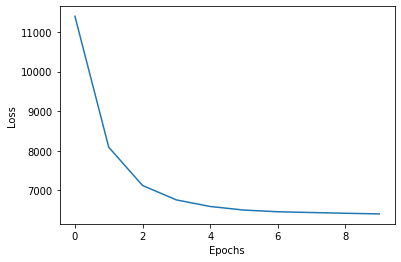

<Figure size 1000x1000 with 0 Axes>

In [236]:
#vals = list(range(216, 227))
vals = [68]

def make_graph(vals, size, time):

    for n in vals:
        x = np.load("losses/train_loss_" + str(n) + ".npy")
        #print(x)
        plt.plot(x[:time])


    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.title("Training Loss for Fitting Random Staircase Functions")
    plt.figure(figsize=(size, size), dpi=200) 
make_graph(vals, 5, 10)

In [99]:
df_na = df_na.set_index('row_index')

In [235]:
df_na[(df_na["function_type"] == "staircase")]

,Unnamed: 0,function_type,degree,depth,num_layers,width,layer_width,num_variables,erm_num_samples,num_training_epochs,num_iter,net_type,train_batch_size,learning_rate,train_loss_initial,val_loss_initial,train_loss_final,val_loss_final
row_index,,,,,,,,,,,,,,,,,,
36,0,staircase,8,two,2,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,5599.192201,5605.770492,3531.893230,3573.455405
37,0,staircase,8,two,2,d,8,32,8000,100,800000,ReLUResNet,20,0.01,4776.073293,4838.452202,1043.102788,1088.417330
38,0,staircase,8,two,2,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,5006.632929,4937.044287,585.878173,665.070529
39,0,staircase,8,two,2,4d,32,32,8000,100,800000,ReLUResNet,20,0.01,4466.630355,4675.698609,483.896354,586.054397
40,0,staircase,8,half_d,4,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,4273.677996,4289.345068,1851.862683,1889.264479
41,0,staircase,8,half_d,4,d,8,32,8000,100,800000,ReLUResNet,20,0.01,3492.248604,3529.978888,270.676818,297.241859
42,0,staircase,8,half_d,4,2d,16,32,8000,100,800000,ReLUResNet,20,0.01,3480.732794,3474.919367,11.573175,12.632765
43,0,staircase,8,half_d,4,4d,32,32,8000,100,800000,ReLUResNet,20,0.01,3459.435307,3773.951766,1.924378,3.052556
44,0,staircase,8,d,8,half_d,4,32,8000,100,800000,ReLUResNet,20,0.01,4221.823237,4225.551712,1498.082520,1555.538077


In [101]:
df_na['degree'][36]

8

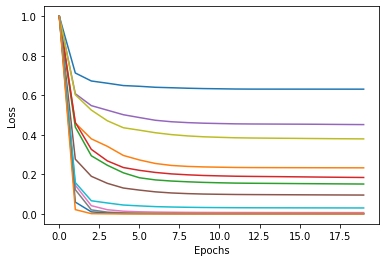

<Figure size 600x600 with 0 Axes>

In [103]:
vals = list(range(36,68))


def make_graph(vals, size, time):

    for n in vals:
        x = np.load("losses/train_loss_" + str(n) + ".npy")
        #print(x[0], x[-1])
        #print(x)
        if df_na['degree'][n] == 8:
            plt.plot(x[:time]/x[0])


    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.title("Training Loss for Fitting Random Staircase Functions")
    plt.figure(figsize=(size, size), dpi=200) 
    
    
make_graph(vals, 3, 20)

[[10.96708902  9.7037226  -0.27822281 -2.20208332]
 [10.1997014   1.24772846 -0.54745285 -2.31143135]
 [ 9.91909267 -4.63941011 -1.9717798  -0.82389826]]


<Figure size 1000x1000 with 0 Axes>

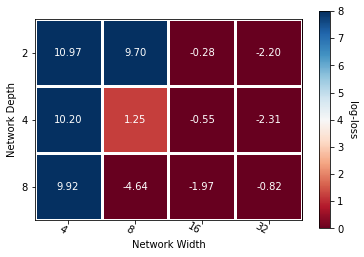

<Figure size 1000x1000 with 0 Axes>

In [221]:
def make_heatmap(df, rn, cn, rows, cols, target):
    
    fig, ax = plt.subplots()
    
    data = []
    for r in rows:
        d = []
        for c in cols:
            #print(df[(df[rn] == r) & (df[cn] == c)][target].values)
            d += [np.log(df[(df[rn] == r) & (df[cn] == c)][target].values[0])]
            #print(d) 
            #break
        data += [d]
    data = np.asarray(data)
    print(data)
    
    im, cbar = heatmap(data, rows, cols, cmap="RdBu", cbarlabel="log-loss", vmin = 0, vmax = 8)
    
    annotate_heatmap(im, textcolors=("black","white"))
    
    
d = 8

depth = [2, int(d/2), d]
width = [int(d/2), d, 2*d, 4*d]
            
df_temp = df_na[(df_na['function_type'] == 'random') & (df_na['degree'] == d)]
make_heatmap(df_temp, "num_layers", "layer_width", depth, width, "val_loss_final")
plt.xlabel("Network Width")
plt.ylabel("Network Depth")
plt.figure(figsize=(5,5), dpi=200) 